In [5]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
## Skill count per month for data analysts
df_DA_CA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

df_DA_CA['job_posted_month_no'] = df_DA_CA['job_posted_date'].dt.month

# Explode job_skills column
df_DA_CA_explode = df_DA_CA.explode('job_skills')

In [7]:
# Group by month and job_skills
df_DA_CA_pivot = df_DA_CA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_CA_pivot

job_skills,airflow,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,tidyverse,typescript,unify,unix,vba,visio,visual basic,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,4,2,0,2,...,0,0,0,0,3,3,1,0,10,3
2,0,0,0,0,1,0,3,8,0,2,...,0,1,0,0,0,3,0,0,5,0
3,0,0,0,0,0,0,2,3,0,0,...,0,0,0,0,1,0,0,0,2,2
4,0,0,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,6,1,1,...,0,0,2,1,0,2,0,0,1,0
6,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,4,4,0,0,6,0
7,2,0,1,0,1,0,0,5,0,1,...,1,0,1,0,4,0,0,0,1,0
8,0,1,0,0,0,0,4,4,0,5,...,0,0,2,0,1,2,0,0,3,0
9,2,1,0,0,0,1,4,7,0,2,...,0,0,0,1,1,3,0,1,3,0


In [8]:
# sorts by count
df_DA_CA_pivot.loc['Total'] = df_DA_CA_pivot.sum()
df_DA_CA_pivot = df_DA_CA_pivot[df_DA_CA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_CA_pivot = df_DA_CA_pivot.drop('Total')

df_DA_CA_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,looker,oracle,...,powershell,no-sql,monday.com,smartsheet,seaborn,tensorflow,typescript,tidyverse,terminal,visual basic
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,43,33,24,22,19,15,6,2,7,4,...,0,0,0,1,0,0,0,0,1,1
2,24,15,10,3,12,8,0,8,1,7,...,1,0,0,0,0,0,1,0,0,0
3,16,11,10,6,5,7,0,3,6,3,...,0,0,0,0,0,0,0,0,0,0
4,14,6,5,5,3,1,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
5,25,17,20,14,12,8,6,6,2,2,...,0,0,0,0,0,0,0,0,0,0
6,26,14,21,12,7,9,8,1,3,5,...,0,1,1,0,0,0,0,0,0,0
7,24,14,18,14,10,10,2,5,1,5,...,0,0,0,0,0,0,0,1,0,0
8,23,15,10,10,10,6,6,4,5,2,...,0,0,0,0,0,0,0,0,0,0
9,36,19,17,18,16,12,6,7,6,6,...,0,0,0,0,0,0,0,0,0,0


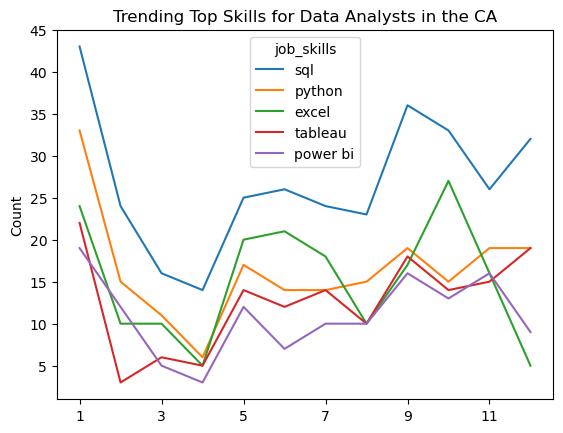

In [9]:
df_DA_CA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the CA')
plt.ylabel('Count')
plt.xlabel('')

# Save the image
plt.savefig('charts/trending_skills_data_analysts_CA.png', bbox_inches='tight')

plt.show()


In [10]:
# Get monthly totals
DA_totals = df_DA_CA.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     65
2     35
3     31
4     26
5     37
6     42
7     40
8     39
9     48
10    58
11    50
12    54
dtype: int64

In [11]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_CA_percent = df_DA_CA_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_CA_percent = df_DA_CA_percent.reset_index()
df_DA_CA_percent['job_posted_month'] = df_DA_CA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_CA_percent = df_DA_CA_percent.set_index('job_posted_month')
df_DA_CA_percent = df_DA_CA_percent.drop(columns='job_posted_month_no')

df_DA_CA_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,looker,oracle,...,powershell,no-sql,monday.com,smartsheet,seaborn,tensorflow,typescript,tidyverse,terminal,visual basic
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,66.153846,50.769231,36.923077,33.846154,29.230769,23.076923,9.230769,3.076923,10.769231,6.153846,...,0.000000,0.000000,0.000000,1.538462,0.000000,0.000000,0.000000,0.0,1.538462,1.538462
Feb,68.571429,42.857143,28.571429,8.571429,34.285714,22.857143,0.000000,22.857143,2.857143,20.000000,...,2.857143,0.000000,0.000000,0.000000,0.000000,0.000000,2.857143,0.0,0.000000,0.000000
Mar,51.612903,35.483871,32.258065,19.354839,16.129032,22.580645,0.000000,9.677419,19.354839,9.677419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Apr,53.846154,23.076923,19.230769,19.230769,11.538462,3.846154,7.692308,7.692308,7.692308,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
May,67.567568,45.945946,54.054054,37.837838,32.432432,21.621622,16.216216,16.216216,5.405405,5.405405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Jun,61.904762,33.333333,50.000000,28.571429,16.666667,21.428571,19.047619,2.380952,7.142857,11.904762,...,0.000000,2.380952,2.380952,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Jul,60.000000,35.000000,45.000000,35.000000,25.000000,25.000000,5.000000,12.500000,2.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.5,0.000000,0.000000
Aug,58.974359,38.461538,25.641026,25.641026,25.641026,15.384615,15.384615,10.256410,12.820513,5.128205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Sep,75.000000,39.583333,35.416667,37.500000,33.333333,25.000000,12.500000,14.583333,12.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


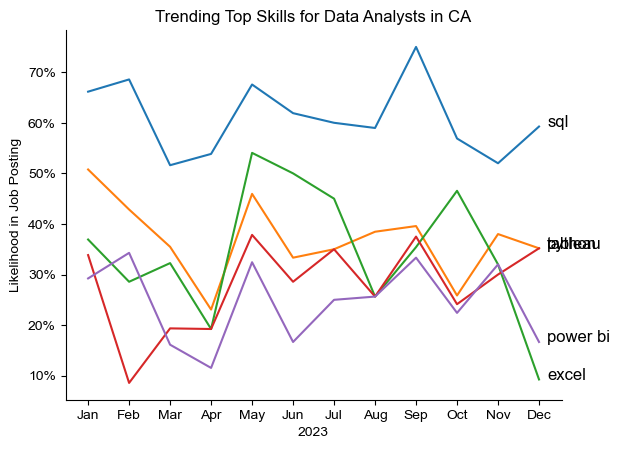

In [12]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_CA_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()  # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in CA')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

# Save the image
plt.savefig('charts/trending_skills_percentage_data_analysts_CA.png', bbox_inches='tight')

plt.show()
